In [ ]:
import nltk
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

# Download datasets
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Load reviews and their corresponding categories
documents = [(movie_reviews.raw(fileid), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle documents
random.shuffle(documents)

# Convert to DataFrame
df = pd.DataFrame(documents, columns=["review", "label"])


In [ ]:
df.head()

,review,label
0,the dramatic comedy cousins has all the necess...,pos
1,"well i'll be damned , what a most excellent su...",pos
2,the rocky horror picture show 'special edition...,pos
3,"the blues brothers was a wonderful film , a hi...",neg
4,if chris farley had strapped some fake mutton-...,pos


In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(words)

df['cleaned'] = df['review'].apply(preprocess)


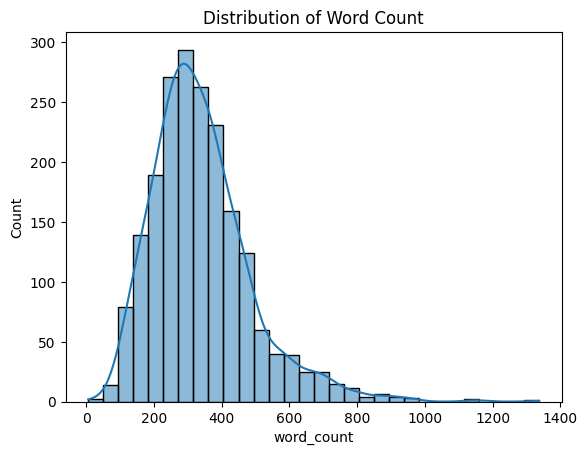

In [ ]:
df['word_count'] = df['cleaned'].apply(lambda x: len(x.split()))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Distribution of Word Count")
plt.show()


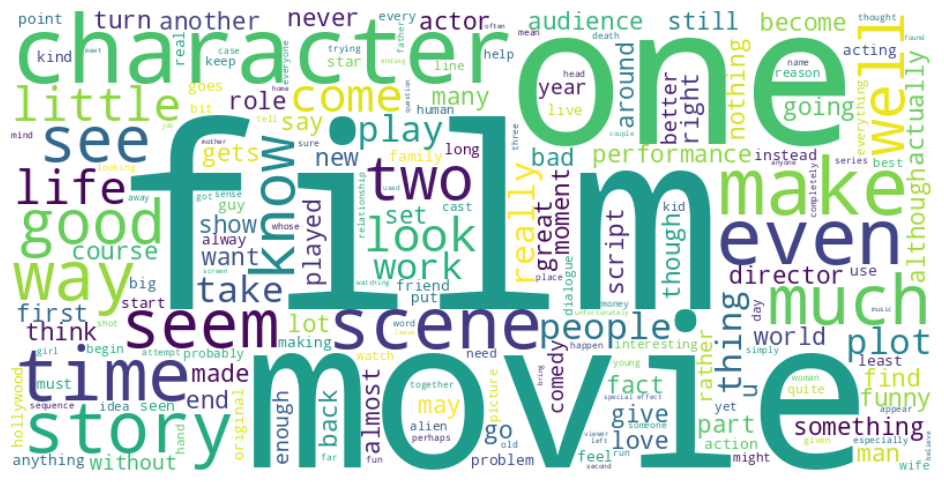

In [ ]:
text_all = " ".join(df['cleaned'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned'], df['label'], test_size=0.2, random_state=42)

# BoW
bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

model_bow = MultinomialNB()
model_bow.fit(X_train_bow, y_train)
y_pred_bow = model_bow.predict(X_test_bow)

print("BoW Model Evaluation")
print(confusion_matrix(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))


BoW Model Evaluation
[[174  18]
 [ 45 163]]
              precision    recall  f1-score   support

         neg       0.79      0.91      0.85       192
         pos       0.90      0.78      0.84       208

    accuracy                           0.84       400
   macro avg       0.85      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



In [ ]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

print("TF-IDF Model Evaluation")
print(confusion_matrix(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))


TF-IDF Model Evaluation
[[177  15]
 [ 57 151]]
              precision    recall  f1-score   support

         neg       0.76      0.92      0.83       192
         pos       0.91      0.73      0.81       208

    accuracy                           0.82       400
   macro avg       0.83      0.82      0.82       400
weighted avg       0.84      0.82      0.82       400

